In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 로드하기
data = pd.read_csv('data/trip.csv')

In [8]:
# Q. info() 메서드를 사용하여 데이터 컬럼명과 자료형을 확인합니다.

# [[YOUR CODE]]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [9]:
# Q. describe() 메서드를 사용하여 데이터 컬럼별 통계량을 확인합니다.

# [[YOUR CODE]]

data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [10]:
# Q. 중복 데이터를 확인합니다.

# [[YOUR CODE]]
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [12]:
# Sarah Gross / Lisa Bullock
# data[data['passenger_name'] == 'Sarah Gross']
data[data['passenger_name'] == 'Lisa Bullock']


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


In [13]:
## stage3 결측치? 
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [14]:
data.isna().mean() # fare_amount! (0.0132%)

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [20]:
# 결측치제거? 
# data.shape # 22701행
# data.dropna().shape # 22698 행
data = data.dropna()

In [21]:
## stage04 이상치 제거
data['passenger_count'].sort_values()

12804     0
19458     0
5565      0
5670      0
13718     0
         ..
21791     6
15629     6
4854      6
0         6
64       36
Name: passenger_count, Length: 22698, dtype: int64

<AxesSubplot:ylabel='trip_distance'>

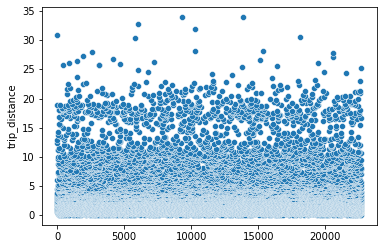

In [24]:
## 이상치 제거 'trip_distance'

# data['trip_distance'].sort_values()
# 일단 trip_distance로 정렬?
# data['trip_distance']=data['trip_distance'].sort_values()

data = data.sort_values(by='trip_distance') # 이렇게 정렬?

# 그 다음에 index와 trip_distance로 sns.scatterplot?
sns.scatterplot(x = data.index, y=data['trip_distance'])

<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

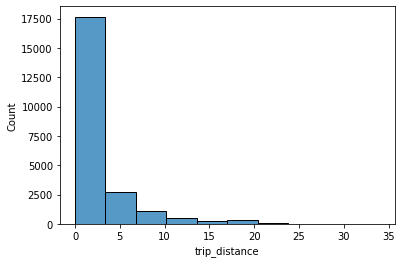

In [27]:
sns.histplot(data=data, x='trip_distance', bins=10) # 20 이상부터는 outlier?

In [28]:
data[data['trip_distance']>20]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4863,Brian Meadows,05/25/2017 10:18:05 PM,05/25/2017 10:52:09 PM,Cash,6,20.03,52.00,0.00,5.76
8472,Joseph Price,09/25/2017 9:52:24 PM,09/25/2017 10:32:00 PM,Cash,1,20.08,52.00,0.00,5.76
19666,Stacey Taylor,09/24/2017 11:22:07 AM,09/24/2017 12:02:21 PM,Cash,2,20.11,52.00,11.71,5.76
19874,Jermaine Rivera,03/25/2017 9:33:54 AM,03/25/2017 10:08:49 AM,Cash,1,20.20,52.00,11.70,5.76
1417,Brandi Beck,05/23/2017 11:10:50 AM,05/23/2017 12:11:06 PM,Credit Card,2,20.20,52.00,11.70,5.76
...,...,...,...,...,...,...,...,...,...
30,David Burton,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,Credit Card,1,30.83,80.00,18.56,11.52
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
6066,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.00,55.50,16.26
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


In [29]:
# trip_distance 20초과는 이상치로 간주하여 제거(9개)
data = data[data['trip_distance']<=20]

In [32]:
# fare_amount 이상치 제거
# fare_amount 0이하?

sum(data['fare_amount']<=0) # 이상치 개수 19개

19

In [33]:
# fare_amount는 0초과해야함

data = data[data['fare_amount']>0]

<AxesSubplot:ylabel='fare_amount'>

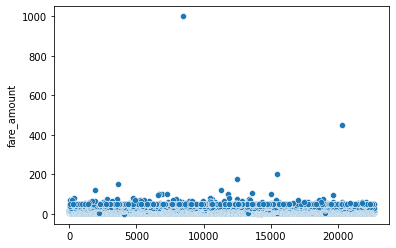

In [35]:
# Q. fare_amount의 scatter plot을 그립니다.

# [[YOUR CODE]]
sns.scatterplot(x = data.index, y=data['fare_amount'])

<AxesSubplot:ylabel='tip_amount'>

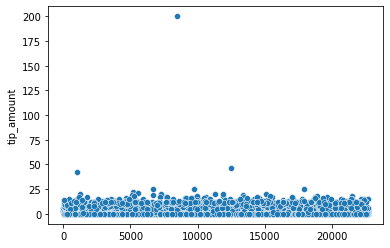

In [36]:
# Q. tip_amount의 이상치를 확인합니다.

# [[YOUR CODE]]
sns.scatterplot(data=data, x=data.index, y='tip_amount') # 30넘는 3개?

In [37]:
# Q. tip_amount의 이상치를 제거합니다.

# [[YOUR CODE]]
data = data[data['tip_amount']<30]

In [38]:
## 02-05 범주형 데이터 전처리
## 결제 방법: Debit Card와 Credit Card를 Card로 통합합니다.

data.payment_method.value_counts()

Cash           11117
Debit Card      5738
Credit Card     5685
Name: payment_method, dtype: int64

In [40]:
# replace 함수 활용
data['payment_method'] = data['payment_method'].replace({'Debit Card':'Card', 'Credit Card':'Card'})

In [41]:
# 제대로 되었는지 확인?
data['payment_method'].value_counts()

Card    11423
Cash    11117
Name: payment_method, dtype: int64

In [50]:
# data['passenger_name'].str.split().str[0]

293        Deborah
21979      Kathryn
13795        Linda
10925        Chase
9665          John
           ...    
15891        Carol
20958       Hannah
1379      Jonathan
17048    Alexander
14467       Brooke
Name: passenger_name, Length: 22540, dtype: object

In [51]:
data['passenger_name'].head()

293        Deborah Sanford
21979    Kathryn Maldonado
13795         Linda Taylor
10925          Chase Clark
9665         John Fletcher
Name: passenger_name, dtype: object

In [57]:
data['passenger_name'].str.split().str[0]

293        Deborah
21979      Kathryn
13795        Linda
10925        Chase
9665          John
           ...    
15891        Carol
20958       Hannah
1379      Jonathan
17048    Alexander
14467       Brooke
Name: passenger_name, Length: 22540, dtype: object

In [55]:
data['passenger_first_name'] = data['passenger_name'].str.split().str[0]
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.0,2.5,0.00,0.00,Deborah
21979,Kathryn Maldonado,08/08/2017 7:28:47 AM,08/08/2017 7:28:47 AM,Cash,2,0.0,10.5,0.00,0.00,Kathryn
13795,Linda Taylor,03/30/2017 11:23:50 AM,03/30/2017 11:23:57 AM,Card,1,0.0,52.0,10.55,0.00,Linda
10925,Chase Clark,11/23/2017 1:45:55 PM,11/23/2017 1:47:18 PM,Card,1,0.0,3.0,0.00,0.00,Chase
9665,John Fletcher,12/25/2017 10:01:06 PM,12/25/2017 10:01:32 PM,Card,2,0.0,52.0,16.56,13.45,John


In [61]:
## 시간형 자료?
data.info() #  tpep_pickup_datetime, tpep_dropoff_datetime object  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22540 entries, 293 to 14467
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22540 non-null  object 
 1   tpep_pickup_datetime   22540 non-null  object 
 2   tpep_dropoff_datetime  22540 non-null  object 
 3   payment_method         22540 non-null  object 
 4   passenger_count        22540 non-null  int64  
 5   trip_distance          22540 non-null  float64
 6   fare_amount            22540 non-null  float64
 7   tip_amount             22540 non-null  float64
 8   tolls_amount           22540 non-null  float64
 9   passenger_first_name   22540 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.4+ MB


In [62]:
from datetime import datetime
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime']) # datetime 변환

In [63]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime']) # datetime 변환

In [64]:
# Q. 하차 시각과 승차 시각의 차이를 travel_time 컬럼으로 저장합니다.
# [[YOUR CODE]]

data['travel_time'] = data['tpep_dropoff_datetime']-data['tpep_pickup_datetime']

In [66]:
data['travel_time'].head().sort_values(ascending=False)

10925   0 days 00:01:23
293     0 days 00:00:26
9665    0 days 00:00:26
13795   0 days 00:00:07
21979   0 days 00:00:00
Name: travel_time, dtype: timedelta64[ns]

In [67]:
data[data['tolls_amount']>0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
9665,John Fletcher,2017-12-25 22:01:06,2017-12-25 22:01:32,Card,2,0.00,52.0,16.56,13.45,John,0 days 00:00:26
1451,Amy Williams,2017-10-28 19:41:58,2017-10-28 19:42:11,Cash,1,0.00,52.0,4.44,5.76,Amy,0 days 00:00:13
4912,Michael Holmes,2017-12-05 13:04:45,2017-12-05 13:05:00,Cash,1,0.00,52.0,11.70,5.76,Michael,0 days 00:00:15
1519,Lindsey Coleman,2017-06-24 06:55:30,2017-06-24 06:55:52,Cash,1,0.00,59.0,5.00,5.76,Lindsey,0 days 00:00:22
11009,Jordan Peterson,2017-12-29 16:15:19,2017-12-29 16:15:33,Card,1,0.00,52.0,0.00,5.76,Jordan,0 days 00:00:14
...,...,...,...,...,...,...,...,...,...,...,...
12585,Christopher Lewis,2017-08-20 20:13:43,2017-08-20 20:57:40,Cash,1,19.90,52.0,11.70,5.76,Christopher,0 days 00:43:57
15891,Carol Sampson,2017-04-22 11:04:29,2017-04-22 11:53:00,Cash,1,19.91,52.0,0.00,5.76,Carol,0 days 00:48:31
1379,Jonathan Nicholson,2017-02-27 13:27:16,2017-02-27 14:14:26,Cash,2,19.99,52.0,14.58,5.54,Jonathan,0 days 00:47:10
17048,Alexander Carr,2017-06-03 06:47:42,2017-06-03 07:17:08,Card,1,20.00,70.5,17.45,16.50,Alexander,0 days 00:29:26


In [68]:
# Q. 승객이 지불한 총 요금을 total_amount 컬럼으로 저장합니다.

# [[YOUR CODE]]
# fare_amount, tip_amount, tolls_amount의 합
data['total_amount'] = data['fare_amount'] + data['tip_amount'] + data['tolls_amount']

<AxesSubplot:xlabel='fare_amount', ylabel='trip_distance'>

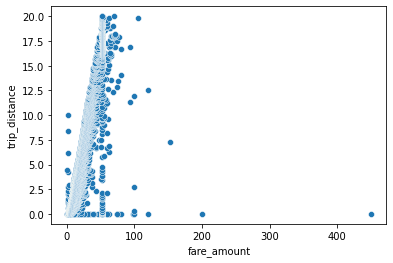

In [69]:
# Q. fare_amount와 trip_distance 사이의 관계를 scatter plot으로 표현합니다.

# [[YOUR CODE]]

sns.scatterplot(data = data, x= 'fare_amount', y='trip_distance')

<AxesSubplot:xlabel='trip_distance', ylabel='travel_time'>

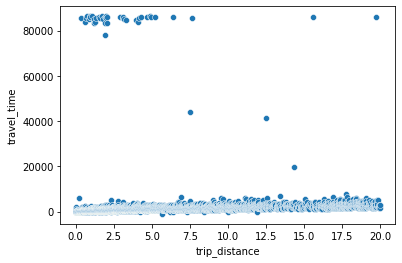

In [71]:
# Q. trip_distance와 travel_time 사이의 관계를 scatter plot으로 표현합니다.

# [[YOUR CODE]]
# 초 단위로 변환 필요
data['travel_time'] = data['travel_time'].dt.total_seconds()
sns.scatterplot(data = data, x = 'trip_distance', y = 'travel_time')

In [72]:
# Q. scatter plot으로 관찰된 travel_time의 이상치를 제거합니다.

# [[YOUR CODE]]
# 20000초, 초과하는 경우 이상을 이상치로 판단

data = data[data['travel_time']< 20000]

<AxesSubplot:xlabel='trip_distance', ylabel='travel_time'>

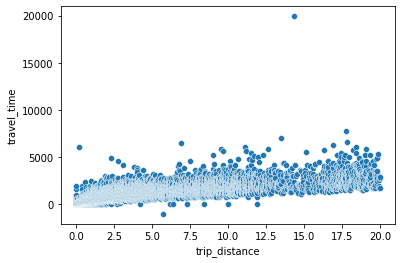

In [73]:
sns.scatterplot(data = data, x = 'trip_distance', y = 'travel_time')